# Using Factor Analyis of Mixed Data (FAMD) on ADNI Dataset

## Some explanation:

As per https://en.wikipedia.org/wiki/Factor_analysis_of_mixed_data we can use FAMD when we have both categorical and numerical variables.
In our case:
        we have Numerical (in the form of 145 ROIs - float) making up the imaging data, 
        and categorical (in the form of 54 SNPs - boolean) making up the genetic data.

"Roughly, we can say that FAMD works as a principal components analysis (PCA) for quantitative variables and as a multiple correspondence analysis (MCA) for qualitative variables."

## Importing Stuff:

In [27]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import pickle
from prince.prince.famd import FAMD

## Reading the Dataset:

In [28]:
unique = pd.read_pickle("./DATA/Linearly_Transformed_Unique_Dataset.pkl")
print(unique.shape)
unique.head()

(1302, 209)


,PTID,MRID,Date,Age,Sex,DLICV_baseline,APOE4_Alleles,APOE_Genotype,Diagnosis_nearest_2.0,MUSE_Volume_4,...,rs111278892,rs3752246,rs4147929,rs41289512,rs3865444,rs6024870,rs6014724,rs7274581,rs429358,Diagnosis_nearest_2.0_cat
0,002_S_0295,002_S_0295_2006-04-18,2006-04-18,84.742466,0,1485405.375,1.0,E3/E4,CN,-401.428503,...,1,1,1,0,0,0,0,0,1,0
9,002_S_0413,002_S_0413_2006-05-02,2006-05-02,76.283562,1,1364116.000,0.0,E3/E3,CN,596.355045,...,0,1,1,0,1,0,0,0,0,0
24,002_S_0559,002_S_0559_2006-05-23,2006-05-23,79.223288,0,1570479.625,1.0,E3/E4,CN,224.874560,...,0,0,0,0,1,0,0,0,0,0
31,002_S_0619,002_S_0619_2006-06-01,2006-06-01,77.447945,0,1859348.250,2.0,E4/E4,Dementia,2633.277779,...,0,0,0,1,1,0,0,0,2,1
45,002_S_0729,002_S_0729_2006-07-17,2006-07-17,65.056164,1,1166961.750,1.0,E3/E4,MCI,256.289641,...,0,0,0,1,1,0,0,0,1,2


### Standardize the Imaging data:

In [ ]:
from sklearn import preprocessing


scaler = preprocessing.StandardScaler()
MRI_columns = c[c.index("MUSE_Volume_4"):c.index("MUSE_Volume_207")+1]
lr_data_scaled = scaler.fit_transform(lr_data[MRI_columns])
lr_data[MRI_columns] = lr_data_scaled

## Employ FAMD:

### Try with 2 components:

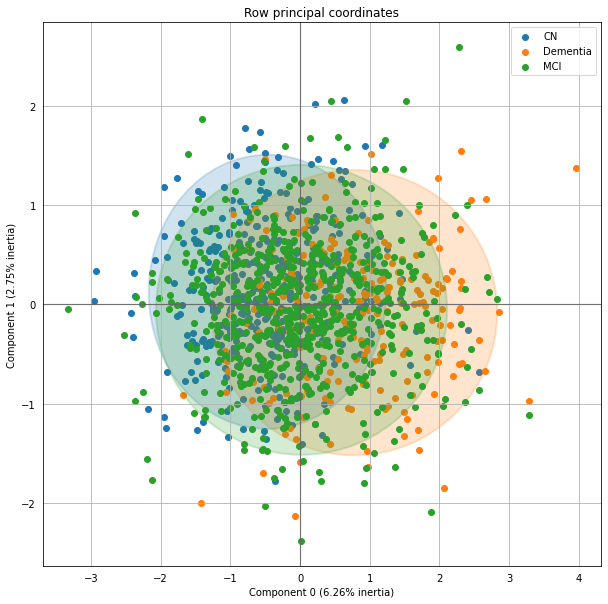

In [29]:
# First get the data to train on: (Both of them together, the algorithm figures out which is which)
l = list(unique.columns)
columns_to_train_on = l[l.index("MUSE_Volume_4"):l.index("rs429358")+1]
X = unique[columns_to_train_on]

# Categorical columns must be type string:
for genetic_name in list(unique.loc[:,"rs4575098":"rs429358"].columns):
    a = X[genetic_name].astype('string')
    X.loc[:,genetic_name] = a

# Reset the index to ensure that FAMD works:/
X = X.reset_index()

# Get the labels after
Y = unique["Diagnosis_nearest_2.0"].astype('string')

# Number of components is the number to which the dimension will be reduced
# Default checks input, copies dataset
# Needs to be in pandas or np.ndarray format
famd = FAMD(n_components=2, n_iter=3) 
famd.fit(X,y=Y)

# Make a visualization using the inherited method from MFA:
ax = famd.plot_row_coordinates(X,
                               ax=None,
                               figsize=(10,10),
                               x_component=0,
                               y_component=1,
                               color_labels=list(Y),
                               ellipse_outline=True,
                               ellipse_fill=True,
                               show_points=True)
plt.show()

### Try with 4 components:

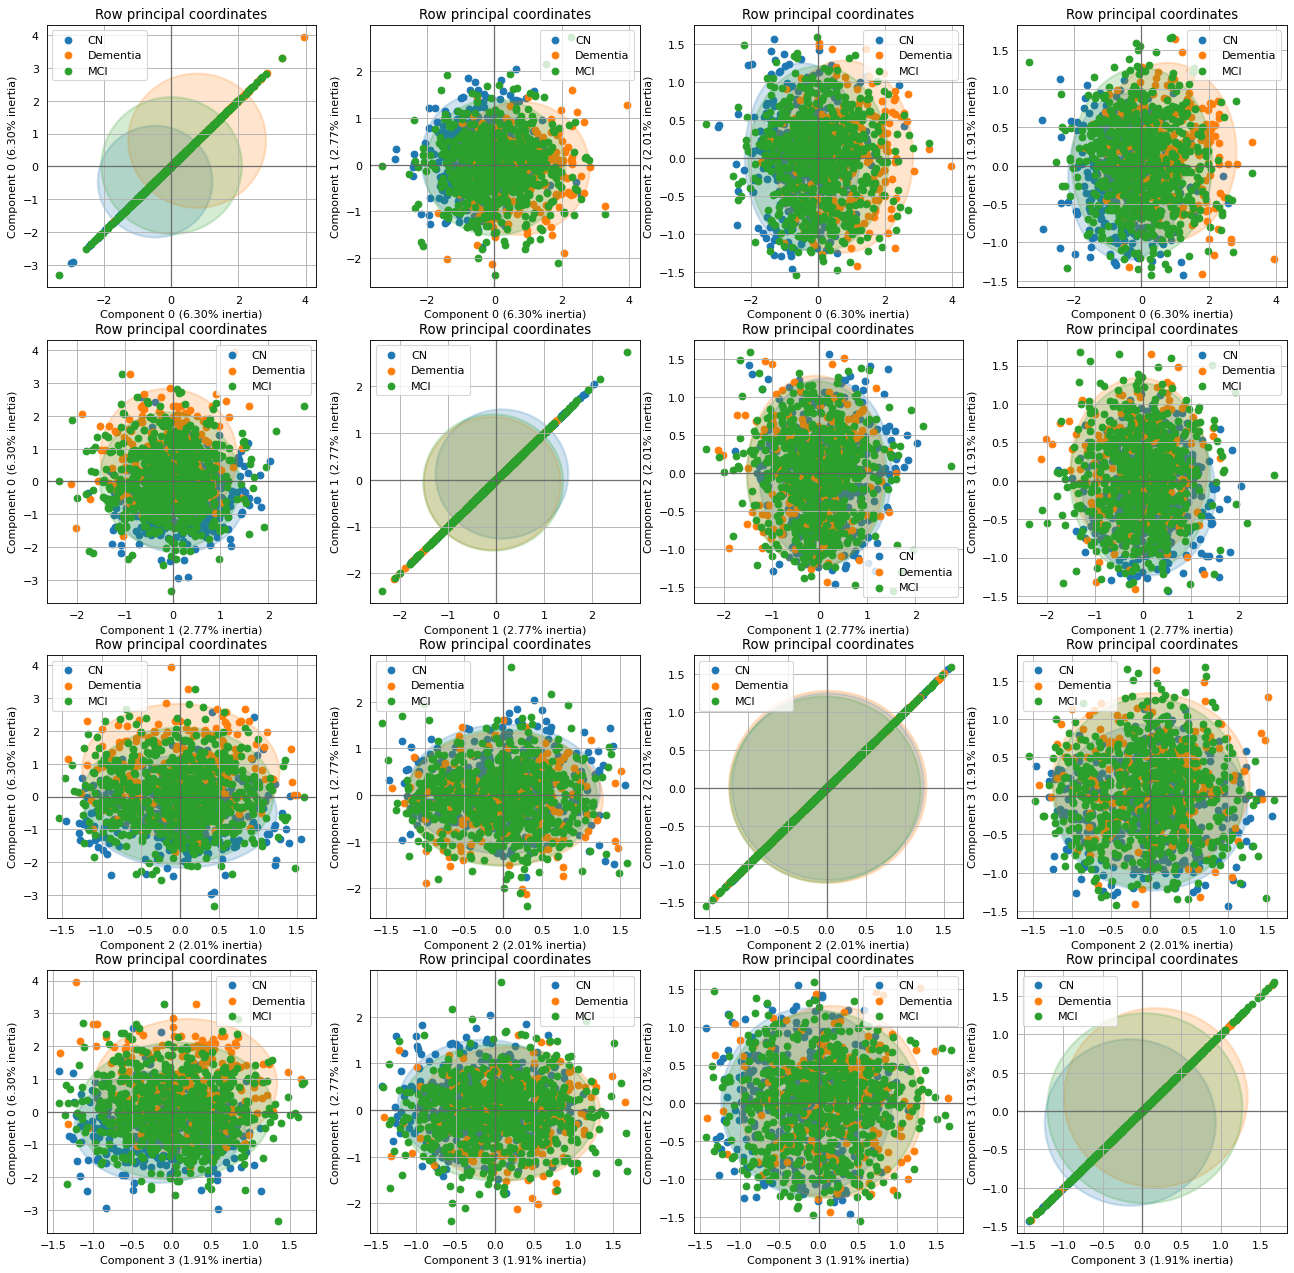

In [30]:
# First get the data to train on: (Both of them together, the algorithm figures out which is which)
l = list(unique.columns)
columns_to_train_on = l[l.index("MUSE_Volume_4"):l.index("rs429358")+1]
X = unique[columns_to_train_on]

# Categorical columns must be type string:
for genetic_name in list(unique.loc[:,"rs4575098":"rs429358"].columns):
    a = X[genetic_name].astype('string')
    X.loc[:,genetic_name] = a

# Reset the index to ensure that FAMD works:/
X = X.reset_index()

# Get the labels after
Y = unique["Diagnosis_nearest_2.0"].astype('string')

# Number of components is the number to which the dimension will be reduced
# Default checks input, copies dataset
# Needs to be in pandas or np.ndarray format
famd = FAMD(n_components=4, n_iter=3) 
famd.fit(X,y=Y)

# Make a visualization using the inherited method from MFA:
fig, ax_arr = plt.subplots(nrows=4,ncols=4,figsize=(20,20), dpi=80)

combinations = [(x,y) for x in range(4) for y in range(4)]
for x,y in combinations:
    famd.plot_row_coordinates(X,
                              ax=ax_arr[x,y],
                              figsize=(10,10),
                              x_component=x,
                              y_component=y,
                              color_labels=list(Y),
                              ellipse_outline=True,
                              ellipse_fill=True,
                              show_points=True)
plt.show()

## Elaboration:

In [34]:
n_comps = 10
famd = FAMD(n_components=n_comps, n_iter=3) 
famd.fit(X,y=Y)

print("########################################################")
# The inertia for a component describes the amount of variation the component explains. 
# The inertia for a column describes how much the values for that category differ from 
# the expected value under the assumption that none of the categorical variables are 
# correlated. 
print("Total Inertia: ", famd.total_inertia_)
print("Sum of eigenv: ", famd.eigenvalues_.sum())
print("Expl inert sum:", sum(famd.explained_inertia_))
print("########################################################")
for i in range(n_comps):
    print("Explained Inertia for component %d: " %i, famd.explained_inertia_[i])
print("########################################################")
print("Number of Eigenvalues: ", len(famd.eigenvalues_))
print(famd.eigenvalues_)
print("########################################################")
print("Explained variance by component:")
for i in range(n_comps):
    print("Explained Variance for component ", i, ": ", round(100*famd.eigenvalues_[i]/sum(famd.eigenvalues_),2),"%",sep="")
print("########################################################")
print("Ratios between explained inertia and explained variance:")
print(famd.explained_inertia_[0]/(famd.eigenvalues_[0]/sum(famd.eigenvalues_)))
print(famd.explained_inertia_[1]/(famd.eigenvalues_[1]/sum(famd.eigenvalues_)))
print(famd.explained_inertia_[2]/(famd.eigenvalues_[2]/sum(famd.eigenvalues_)))

########################################################
Total Inertia:  0.012351301486652004
Sum of eigenv:  0.0028914725613359343
Expl inert sum: 0.23410266233568464
########################################################
Explained Inertia for component 0:  0.06337107394276567
Explained Inertia for component 1:  0.027971062715509424
Explained Inertia for component 2:  0.0204837884160819
Explained Inertia for component 3:  0.019598719132857375
Explained Inertia for component 4:  0.018367650006253608
Explained Inertia for component 5:  0.018152900979850253
Explained Inertia for component 6:  0.01721716796224692
Explained Inertia for component 7:  0.016848187716438628
Explained Inertia for component 8:  0.016368298853651184
Explained Inertia for component 9:  0.015723812610029708
########################################################
Number of Eigenvalues:  10
[0.00078272 0.00034548 0.000253   0.00024207 0.00022686 0.00022421
 0.00021265 0.0002081  0.00020217 0.00019421]
############

In [36]:
transformed_genetic_data = famd.transform(X)
columns = ["Component " + str(x) for x in list(transformed_genetic_data.columns)]
transformed_genetic_data.columns = columns
print(transformed_genetic_data.shape)
transformed_genetic_data.head()

(1302, 10)


,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9
0,-0.458537,1.191976,0.213234,-0.454051,-0.646684,0.025220,-0.733883,0.115547,-0.835330,0.574247
1,-0.623830,0.435098,0.432188,0.921615,-0.061815,0.192108,-0.853644,-0.521925,-0.301022,-0.636971
2,-0.727419,1.577828,-0.132211,-1.184806,-0.352358,-0.620869,-0.197984,-0.522243,-0.109195,-0.619681
3,2.069125,-1.895185,-0.676591,0.890941,0.657846,0.214591,-0.293011,-0.089317,0.440440,-0.184255
4,0.702825,0.594687,0.033435,-0.222714,-0.138131,-0.446616,-0.789827,-0.452877,-0.142894,-0.573783


## Saving the transformed features:

In [37]:
transformed_genetic_data.to_pickle("./DATA/FAMD_Transformed_data_10_components.pkl")